<a id = "Table_of_content"></a>
# Table of content
### 1. [Data Cleaning](#T1)
### 2. [Build the model](#T3)

# Objective
* predict the probability that a customer does not pay back their credit card balance

<a id = "T1"></a></a><div style="text-align: right"> <a href=#Table_of_content>Back?</a> </div>
# Data Cleaning

In [31]:
import numpy as np
import pandas as pd

In [32]:
df_train = pd.read_csv('train_14.csv')  
df_label = pd.read_csv("label_14.csv")

In [33]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21671 entries, 0 to 21670
Columns: 151 entries, Diff_date_0 to D_145_0
dtypes: float64(151)
memory usage: 25.0 MB


In [34]:
df_train.head(5)

,Diff_date_0,num_date,P_2_0,D_39_0,B_1_0,B_2_0,R_1_0,D_41_0,B_3_0,D_44_0,...,D_130_0,D_131_0,D_133_0,R_28_0,D_139_0,D_140_0,D_141_0,D_143_0,D_144_0,D_145_0
0,0.056604,0.230769,0.255796,0.007591,0.208633,1.004648,1.003797,0.009316,0.004711,0.118879,...,1.002404,1.006387,1.501225,0.004692,1.005313,0.004475,0.876428,1.005640,0.001958,0.094792
1,0.115903,0.307692,0.473247,1.744329,0.163106,0.046546,0.253259,0.376542,0.120917,0.259087,...,0.007439,0.004521,0.004727,0.004850,0.004179,0.002910,0.004125,0.004739,0.003015,0.000415
2,0.088949,0.307692,0.989204,0.009665,0.008346,0.810322,0.005626,0.008064,0.006941,0.001926,...,0.007380,0.000697,0.001616,0.001213,0.002935,0.004522,0.006624,0.001399,0.005270,0.007177
3,0.091644,0.153846,0.068484,0.914384,1.318354,0.000749,0.754111,0.005856,0.260480,0.384178,...,0.001853,0.004438,0.003699,0.008947,0.004734,0.008115,0.004823,0.003049,0.001506,0.008167
4,0.040431,0.076923,0.286224,0.007035,0.003712,0.815825,0.507655,0.008014,0.000327,0.131792,...,0.002419,0.000184,0.004038,0.006742,0.000577,0.005503,0.001053,0.003976,0.007178,0.008273


In [35]:
df_num_date = df_train["num_date"] / 5
df_train = df_train.drop(columns =["num_date"])

df_train.insert(2,"num_date1",df_num_date)
df_train.insert(9,"num_date2",df_num_date)
df_train.insert(16,"num_date3",df_num_date)
df_train.insert(23,"num_date4",df_num_date)
df_train.insert(30,"num_date5",df_num_date)

row, col = df_train.shape
df_train = np.reshape(df_train.to_numpy(),(-1,5,31))
df_train.shape

(21671, 5, 31)

<a id = "T3"></a></a><div style="text-align: right"> <a href=#Table_of_content>Back?</a> </div>
# Build the model

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras.layers import Conv1D, Conv2D, MaxPooling2D, MaxPooling1D, Flatten,Dropout
from keras.callbacks import EarlyStopping

In [37]:
def process_x_y_train_valid(df_train, df_label, s):
    x_train = df_train[: int(df_train.shape[0] * 0.80)][...,None]
    x_valid = df_train[int(df_train.shape[0] * 0.80):][...,None]

    y_train = df_label[: int(df_label.shape[0] * 0.80)].to_numpy()
    y_train = np.reshape(y_train, (y_train.shape[0],))
    y_train = tf.one_hot(y_train, 2)
    
    y_valid = df_label[int(df_label.shape[0] * 0.80):].to_numpy()
    y_valid = np.reshape(y_valid, (y_valid.shape[0],))
    y_valid = tf.one_hot(y_valid, 2)
    
    print(f"For train dataset {s}: ", x_train.shape, y_train.shape)
    print(f"For validation dataset {s}: ", x_valid.shape, y_valid.shape,"\n")
    return x_train, y_train, x_valid, y_valid

In [42]:
x_train14, y_train14, x_valid14, y_valid14 = process_x_y_train_valid(df_train, df_label, "1_4")

For train dataset 1_4:  (17336, 5, 31, 1) (17336, 2)
For validation dataset 1_4:  (4335, 5, 31, 1) (4335, 2) 



In [24]:
def create_ANN(input_data):
    
    model = Sequential()
    model.add(Conv2D(128, (2,2),activation = 'relu', input_shape = input_data.shape[1:] ))
    model.add(MaxPooling2D())
    model.add(Conv2D(128, (2,2),activation = 'relu', input_shape = input_data.shape[1:] ))
    model.add(Flatten())
    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.7))
    model.add(Dense(64, activation = 'relu'))    
    model.add(Dropout(0.7))
    model.add(Dense(2, activation = 'softmax'))
    
    return model

In [25]:
ANN_1_4 = create_ANN(x_train14)
print(ANN_1_4.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 4, 30, 128)        640       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 2, 15, 128)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 1, 14, 128)        65664     
                                                                 
 flatten_3 (Flatten)         (None, 1792)              0         
                                                                 
 dense_9 (Dense)             (None, 128)               229504    
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                      

In [26]:
callbacks = [EarlyStopping(monitor = 'val_accuracy', patience = 8, min_delta = 0, mode = 'auto')]
ANN_1_4.compile(loss = tf.keras.losses.BinaryCrossentropy(), optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0003), metrics = ['accuracy'])

# Try without callback
history = ANN_1_4.fit(x_train14, y_train14, batch_size = 128, epochs = 50, 
                      validation_data = (x_valid14, y_valid14),callbacks=callbacks, verbose=1)

Epoch 1/50
136/136 [==============================] - 4s 26ms/step - loss: 0.6238 - accuracy: 0.6699 - val_loss: 0.5332 - val_accuracy: 0.7359
Epoch 2/50
136/136 [==============================] - 3s 25ms/step - loss: 0.5447 - accuracy: 0.7409 - val_loss: 0.5098 - val_accuracy: 0.7693
Epoch 3/50
136/136 [==============================] - 3s 25ms/step - loss: 0.5003 - accuracy: 0.7667 - val_loss: 0.4527 - val_accuracy: 0.7880
Epoch 4/50
136/136 [==============================] - 4s 26ms/step - loss: 0.4702 - accuracy: 0.7787 - val_loss: 0.4478 - val_accuracy: 0.7965
Epoch 5/50
136/136 [==============================] - 4s 26ms/step - loss: 0.4590 - accuracy: 0.7903 - val_loss: 0.4327 - val_accuracy: 0.8072
Epoch 6/50
136/136 [==============================] - 3s 26ms/step - loss: 0.4485 - accuracy: 0.7928 - val_loss: 0.4508 - val_accuracy: 0.7799
Epoch 7/50
136/136 [==============================] - 4s 26ms/step - loss: 0.4420 - accuracy: 0.7956 - val_loss: 0.4227 - val_accuracy: 0.8060

In [28]:
ANN_1_4.save("ANN14.h5")

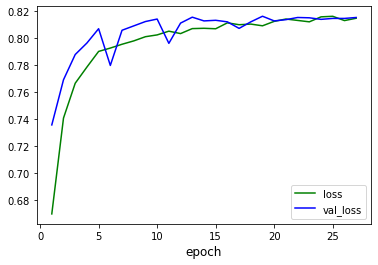

In [27]:
import matplotlib.pyplot as plt
plt.plot(range(1,len(history.history['loss']) + 1), history.history['accuracy'],label="loss", color = 'g')
plt.plot(range(1,len(history.history['loss']) + 1), history.history['val_accuracy'],label="val_loss", color = 'b')
plt.xlabel('epoch', fontsize = 12)
plt.legend()

In [44]:
from sklearn.metrics import f1_score, accuracy_score

def get_score(filename):
    ANN_model = tf.keras.models.load_model(filename)
    result1 =  ANN_model.predict(x_valid14)
    print("For model",filename)
    print("F1-score:",f1_score(np.argmax(result1,axis=1), np.argmax(y_valid14,axis=1)))
    print("Accuracy:",accuracy_score(np.argmax(result1,axis=1), np.argmax(y_valid14,axis=1)))
    print("")

get_score("ANN14.h5")

For model ANN14_2.h5
F1-score: 0.7311827956989246
Accuracy: 0.8154555940023068



In [9]:
from itertools import combinations

def get_combinations(prize_list, n, max_sum=100):
    # Step 1: Find all possible combinations within the max sum limit
    valid_combinations = []
    for r in range(1, len(prize_list) + 1):
        for combo in combinations(prize_list, r):
            if sum(combo) <= max_sum:
                valid_combinations.append(combo)
    
    # Step 2: Sort combinations by sum in descending order to maximize
    valid_combinations = sorted(valid_combinations, key=lambda x: sum(x), reverse=True)
    
    # Step 3: Return the top 'n' combinations
    return valid_combinations[:n]

# Prize list and number of combinations to find
prize_list = [49.9,49.9,55,59.5,65.9]
n = 50  # Number of combinations to return

# Get combinations

top_combinations = get_combinations(prize_list, n, 120)
for idx, combo in enumerate(top_combinations, 1):
    print(f"Combination {idx}: {combo}, Sum: {sum(combo)}")

Combination 1: (49.9, 65.9), Sum: 115.80000000000001
Combination 2: (49.9, 65.9), Sum: 115.80000000000001
Combination 3: (55, 59.5), Sum: 114.5
Combination 4: (49.9, 59.5), Sum: 109.4
Combination 5: (49.9, 59.5), Sum: 109.4
Combination 6: (49.9, 55), Sum: 104.9
Combination 7: (49.9, 55), Sum: 104.9
Combination 8: (49.9, 49.9), Sum: 99.8
Combination 9: (65.9,), Sum: 65.9
Combination 10: (59.5,), Sum: 59.5
Combination 11: (55,), Sum: 55
Combination 12: (49.9,), Sum: 49.9
Combination 13: (49.9,), Sum: 49.9
